In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/Covid_Data_Clean.csv')

# Distribucija ishoda prema starosti (Istraživačko pitanje br. 1)

Kakva je distribucija ishoda bolesti u odnosu na starosne grupe i pol pacijenata u posmatranom skupu podataka?

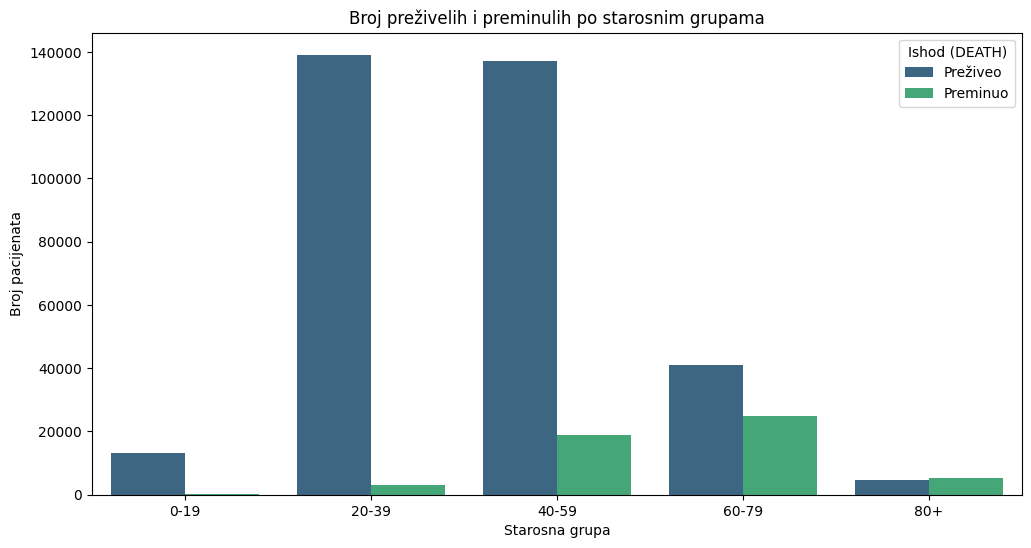

In [2]:
# Definisanje redosleda grupa
redosled_grupa = ['0-19', '20-39', '40-59', '60-79', '80+']

# Pretvaranje kolone u 'category' tip sa definisanim redosledom
df['AGE_GROUP'] = pd.Categorical(df['AGE_GROUP'], categories=redosled_grupa, ordered=True)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AGE_GROUP', hue='DEATH', palette='viridis')
plt.title('Broj preživelih i preminulih po starosnim grupama')
plt.xlabel('Starosna grupa')
plt.ylabel('Broj pacijenata')
plt.legend(title='Ishod (DEATH)', labels=['Preživeo', 'Preminuo'])
plt.savefig('../images/distribucija_starost_ishod.png')
plt.show()

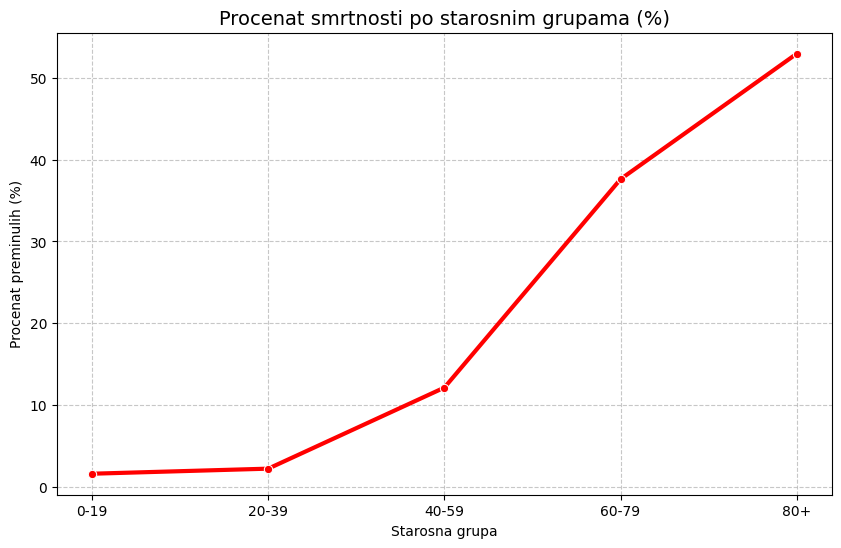

In [3]:
plt.figure(figsize=(10, 6))

mortality_rate = df.groupby('AGE_GROUP', observed=False)['DEATH'].mean() * 100

sns.lineplot(x=mortality_rate.index, y=mortality_rate.values, marker='o', linewidth=3, color='red')
plt.title('Procenat smrtnosti po starosnim grupama (%)', fontsize=14)
plt.ylabel('Procenat preminulih (%)')
plt.xlabel('Starosna grupa')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('../images/procenat_smrtnosti_linijski.png')
plt.show()

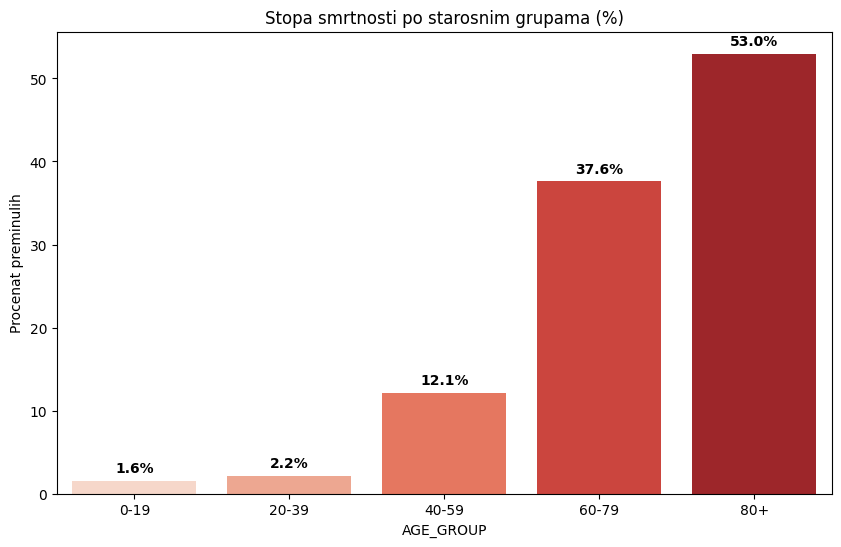

In [4]:
# GRAFIK PROCENE SMTNOSTI PO STAROSNIM GRUPAMA
plt.figure(figsize=(10, 6))
mortality_by_age = df.groupby('AGE_GROUP', observed=False)['DEATH'].mean() * 100

sns.barplot(x=mortality_by_age.index, y=mortality_by_age.values, 
            hue=mortality_by_age.index, palette='Reds', legend=False)

plt.title('Stopa smrtnosti po starosnim grupama (%)')
plt.ylabel('Procenat preminulih')
for i, v in enumerate(mortality_by_age.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')
    
plt.savefig('../images/procenat_smrtnosti_bars.png')
plt.show()

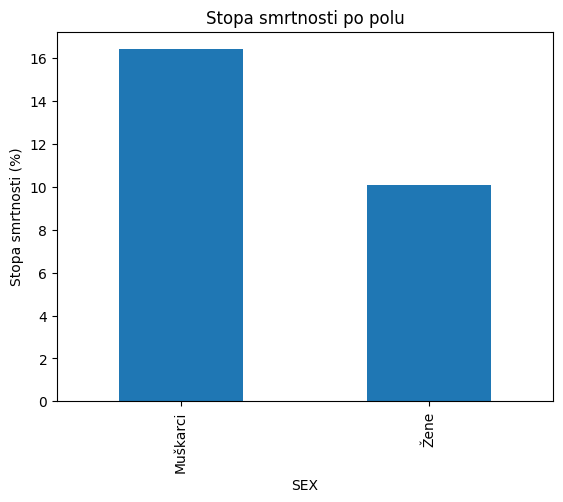

In [5]:
mortality_by_sex = df.groupby('SEX')['DEATH'].mean() * 100
mortality_by_sex.plot(kind='bar')
plt.ylabel('Stopa smrtnosti (%)')
plt.xticks([0, 1], ['Muškarci', 'Žene'])
plt.title('Stopa smrtnosti po polu')
plt.savefig('../images/smrtnost_pol.png')
plt.show()

# Značajnosti faktora hospitalizacije (Istraživačko pitanje br. 2)

Koji faktori najviše utiču na to da li će pacijent biti hospitalizovan?

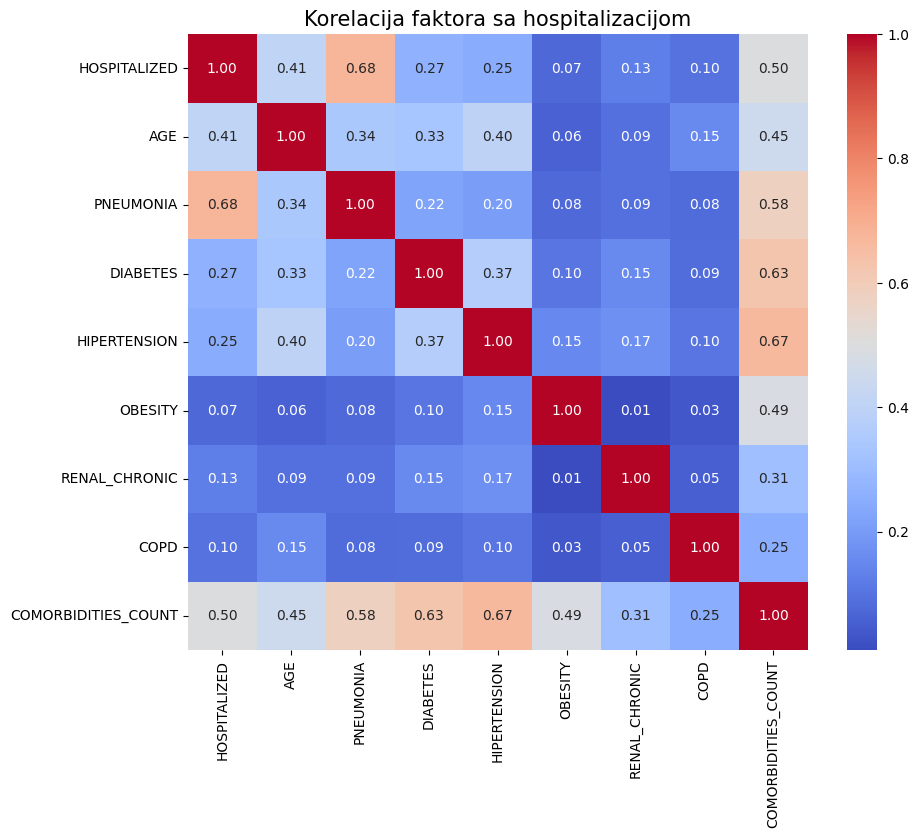

In [6]:
corr_cols = ['HOSPITALIZED', 'AGE', 'PNEUMONIA', 'DIABETES', 'HIPERTENSION', 'OBESITY', 'RENAL_CHRONIC', 'COPD', 'COMORBIDITIES_COUNT']
plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelacija faktora sa hospitalizacijom', fontsize=15)
plt.savefig('../images/korelacija_hospitalizacija.png')
plt.show()

In [7]:
import statsmodels.api as sm

# Biramo faktore za koje pretpostavljamo da utiču na hospitalizaciju
features = ['AGE', 'SEX', 'PNEUMONIA', 'DIABETES', 'HIPERTENSION', 'OBESITY', 'RENAL_CHRONIC', 'COPD']
X = df[features]
y = df['HOSPITALIZED'] 

X = sm.add_constant(X)

logit_model = sm.Logit(y, X).fit()

print("Analiza faktora hospitalizacije:")
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.338303
         Iterations 7
Analiza faktora hospitalizacije:
                           Logit Regression Results                           
Dep. Variable:           HOSPITALIZED   No. Observations:               387382
Model:                          Logit   Df Residuals:                   387373
Method:                           MLE   Df Model:                            8
Date:                Sun, 22 Feb 2026   Pseudo R-squ.:                  0.4290
Time:                        18:38:49   Log-Likelihood:            -1.3105e+05
converged:                       True   LL-Null:                   -2.2952e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.9251      0.019   -212.149      0.000      -3.961

R-squ. (0.4267) - Model objašnjavao oko 42,9% varijacije u tome ko biva hospitalizovan
LLR p-value (0.000) - Model kao celina je statistički značajan, tj. faktori koje smo izabrale nisu slučajno povezani sa hospitalizacijom

PNEUMONIA (3.4570) - Najjači prediktor u celom istraživanju. Pacijenti sa pneumonijom imaju veću šansu da budu zadržani u bolnici u odnosu na one koji je nemaju

RENAL_CHRONIC (1.0078) - Najjači prediktor hospitalizacije, odmah nakon pneumonije. Pacijent sa ovim stanjem ima drastično veće šanse da bude zadržan u bolnici.

AGE (0.0414) - Sa svakom godinom života, verovatnoća hospitalizacije blago raste

SEX (-0.3828): Negativan koeficijent ovde znači da žene imaju manju verovatnoću za hospitalizaciju od muškaraca

DIABETES (0.5848) - Najjači prediktor posle pneumonije i bolesti bubrega

COPD (0.3314) i HIPERTENSION (0.3100) - Obe bolesti takođe značajno povećavaju rizik

OBESITY (0.1077) - Gojaznost takođe povećava rizik, ali je njen uticaj na hospitalizaciju je nešto slabiji od ostalih

SEX (-0.3824) - Negativan koeficijent ukazuje na polni disparitet, tj. muškarci su pod većim rizikom

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6060\281967802.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Ne', 'Da'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6060\281967802.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Ne', 'Da'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6060\281967802.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['Ne', 'Da'])


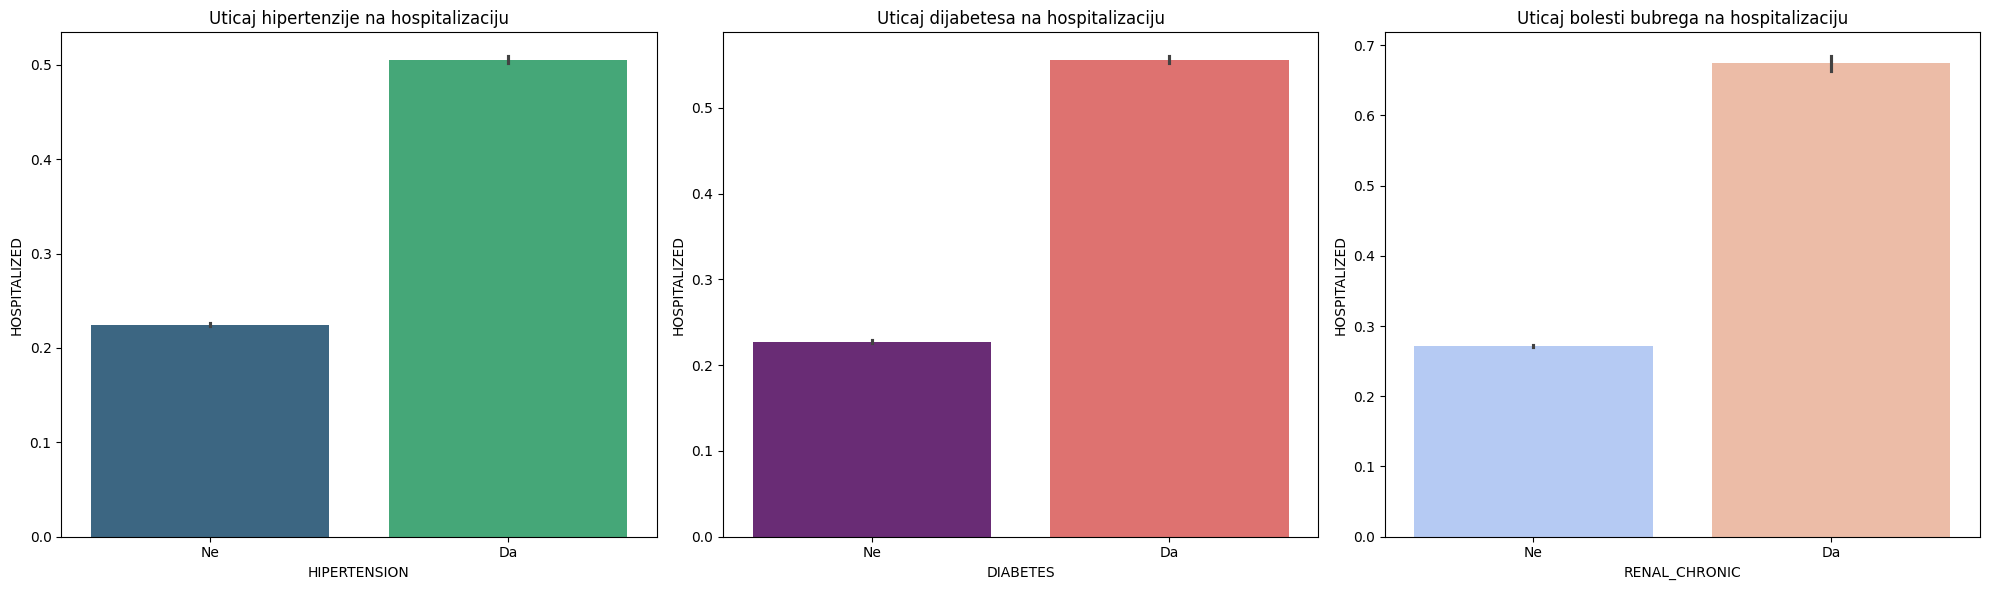

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. HIPERTENZIJA
sns.barplot(ax=axes[0], x='HIPERTENSION', y='HOSPITALIZED', data=df, 
            hue='HIPERTENSION', palette='viridis', legend=False)
axes[0].set_title('Uticaj hipertenzije na hospitalizaciju')
axes[0].set_xticklabels(['Ne', 'Da'])

# 2. DIJABETES
sns.barplot(ax=axes[1], x='DIABETES', y='HOSPITALIZED', data=df, 
            hue='DIABETES', palette='magma', legend=False)
axes[1].set_title('Uticaj dijabetesa na hospitalizaciju')
axes[1].set_xticklabels(['Ne', 'Da'])

# 3. HRONIČNA BOLEST BUBREGA
sns.barplot(ax=axes[2], x='RENAL_CHRONIC', y='HOSPITALIZED', data=df, 
            hue='RENAL_CHRONIC', palette='coolwarm', legend=False)
axes[2].set_title('Uticaj bolesti bubrega na hospitalizaciju')
axes[2].set_xticklabels(['Ne', 'Da'])

plt.tight_layout()
plt.savefig('../images/kljucni_faktori_hospitalizacije.png')
plt.show()

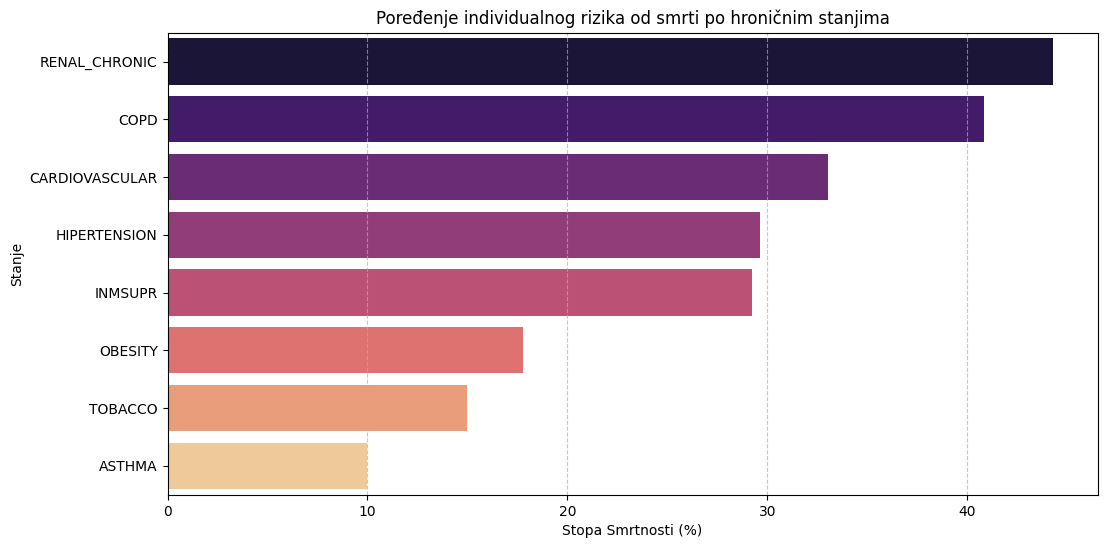

In [9]:
# Lista svih hroničnih stanja
ostala_stanja = ['COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

# Računamo stopu smrtnosti za svako stanje
rizici = []
for stanje in ostala_stanja:
    stopa = df[df[stanje] == 1]['DEATH'].mean() * 100
    rizici.append({'Stanje': stanje, 'Stopa Smrtnosti (%)': stopa})

df_rizici = pd.DataFrame(rizici).sort_values(by='Stopa Smrtnosti (%)', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_rizici, x='Stopa Smrtnosti (%)', y='Stanje', hue='Stanje', palette='magma', legend=False)
plt.title('Poređenje individualnog rizika od smrti po hroničnim stanjima')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig("../images/stopa_smrtnosti_po_bolestima")
plt.show()

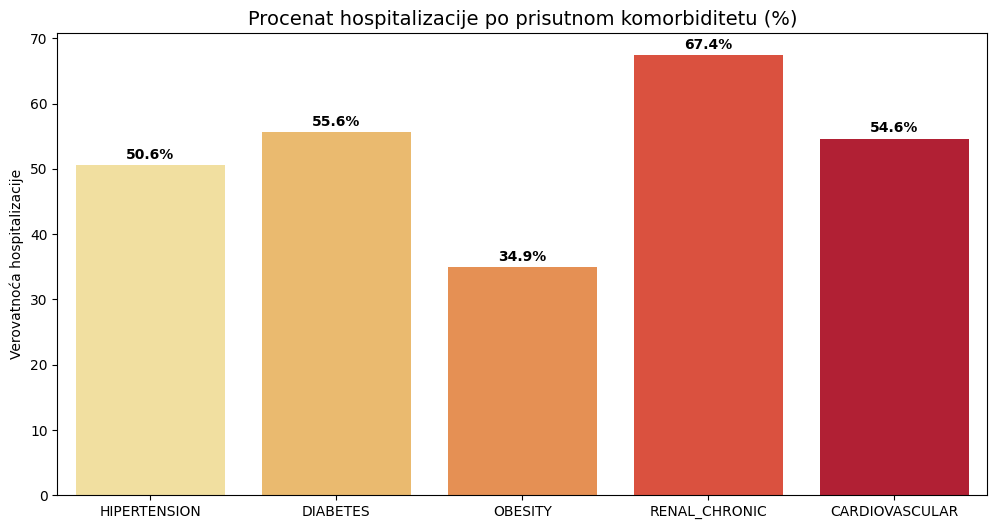

In [10]:
faktori = ['HIPERTENSION', 'DIABETES', 'OBESITY', 'RENAL_CHRONIC', "CARDIOVASCULAR"]

# Računamo procenat hospitalizovanih za svaki faktor
stope_hosp = []
for f in faktori:
    stopa = df[df[f] == 1]['HOSPITALIZED'].mean() * 100
    stope_hosp.append(stopa)

plt.figure(figsize=(12, 6))
sns.barplot(x=faktori, y=stope_hosp, hue=faktori, palette='YlOrRd', legend=False)

plt.title('Procenat hospitalizacije po prisutnom komorbiditetu (%)', fontsize=14)
plt.ylabel('Verovatnoća hospitalizacije')
for i, v in enumerate(stope_hosp):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')
plt.savefig("../images/hospitalizacija_po_bolestima")
plt.show()

# Uticaja komorbiditeta na kritična stanja (ICU i intubaciju) - istraživačko pitanje br. 3

Da li postoji značajna razlika u riziku od kritičnih stanja između pacijenata sa različitim brojem hroničnih oboljenja?

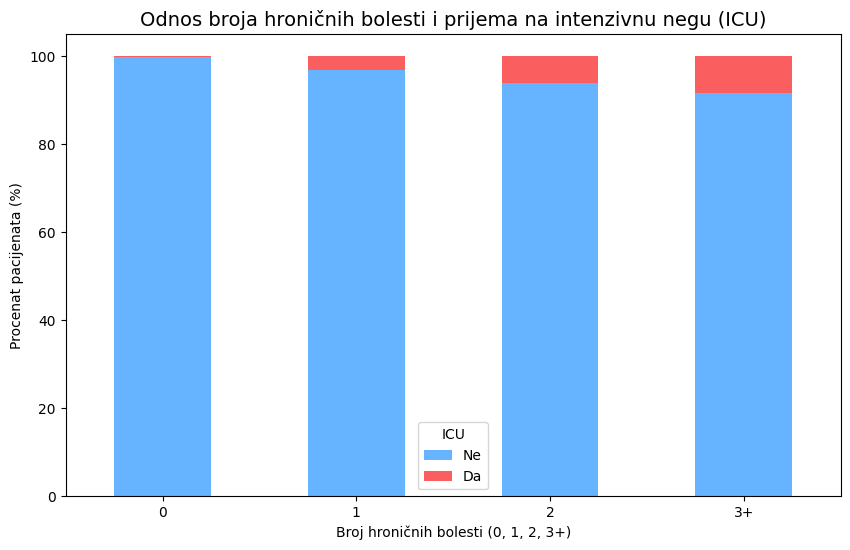

In [11]:
comorb_icu = pd.crosstab(df['COMORBIDITY_GROUP'], df['ICU'], normalize='index') * 100

comorb_icu.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff','#fb5e5e'])
plt.title('Odnos broja hroničnih bolesti i prijema na intenzivnu negu (ICU)', fontsize=14)
plt.xlabel('Broj hroničnih bolesti (0, 1, 2, 3+)')
plt.ylabel('Procenat pacijenata (%)')
plt.legend(title='ICU', labels=['Ne', 'Da'])
plt.xticks(rotation=0)
plt.savefig('../images/komorbiditeti_icu_odnos.png')
plt.show()

In [12]:
from scipy.stats import chi2_contingency

# kreiracemo tabelu koja ukršta broj bolesti i ICU
tabele_kontingencije = pd.crosstab(df['COMORBIDITY_GROUP'], df['ICU'])

stat, p, dof, expected = chi2_contingency(tabele_kontingencije)

print(f"Hi-kvadrat statistika: {stat:.2f}")
print(f"P-vrednost: {p:.4f}")

if p < 0.05:
    print("Postoji statistički značajna povezanost. Broj hroničnih bolesti utiče na verovatnoću kritičnog stanja.")
else:
    print("Nema statistički značajne povezanosti između broja hroničnih bolesti i verovatnoće kritičnog stanja")

Hi-kvadrat statistika: 11393.58
P-vrednost: 0.0000
Postoji statistički značajna povezanost. Broj hroničnih bolesti utiče na verovatnoću kritičnog stanja.


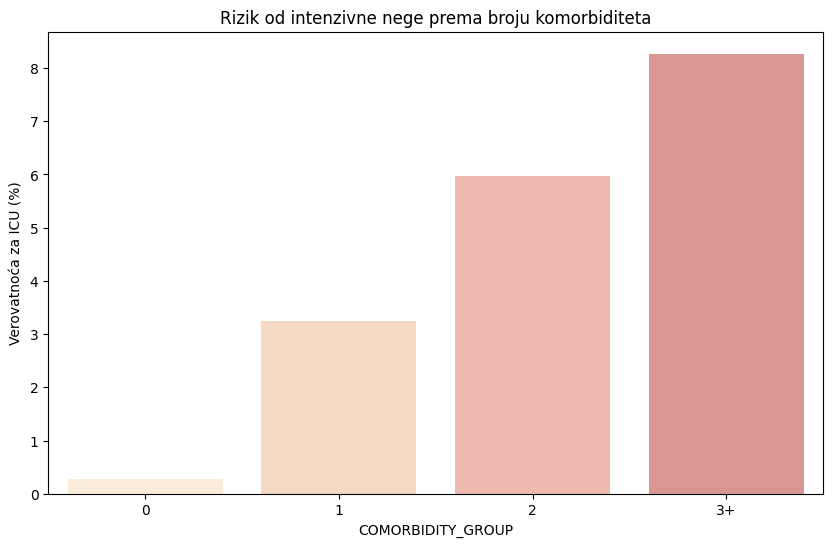

In [13]:
plt.figure(figsize=(10, 6))
icu_trend = df.groupby('COMORBIDITY_GROUP')['ICU'].mean() * 100

sns.barplot(x=icu_trend.index, y=icu_trend.values, alpha=0.5, 
            hue=icu_trend.index, palette='OrRd', legend=False)

plt.title('Rizik od intenzivne nege prema broju komorbiditeta')
plt.ylabel('Verovatnoća za ICU (%)')
plt.savefig('../images/ICU_rizik_i_komorbiteti.png')
plt.show()

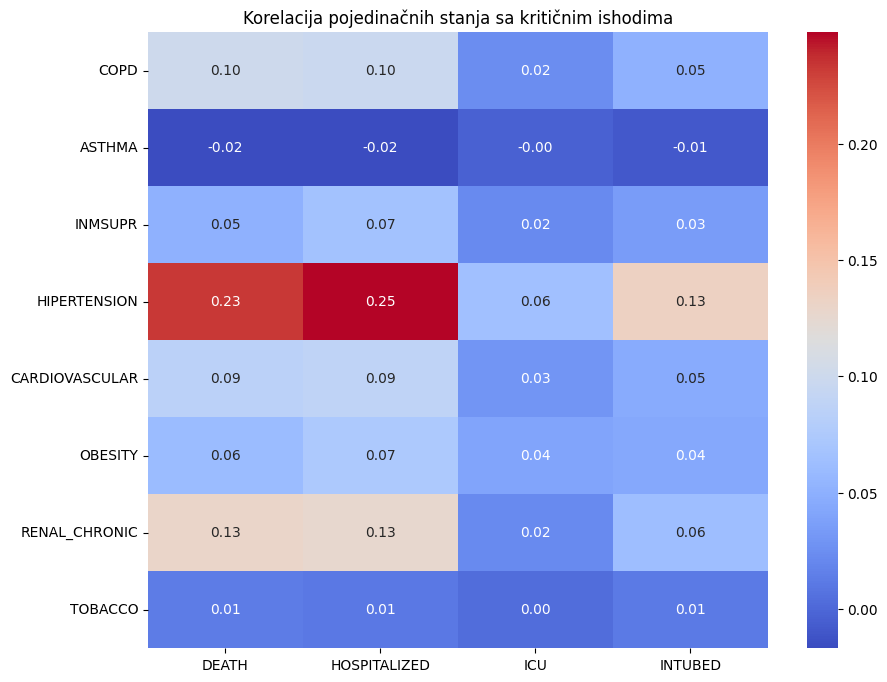

In [14]:
# Fokusiramo se na odnos specifičnih bolesti i ishoda
fokus_kolone = ostala_stanja + ['DEATH', 'HOSPITALIZED', 'ICU','INTUBED']
corr_matrix = df[fokus_kolone].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['DEATH', 'HOSPITALIZED', 'ICU','INTUBED']].drop(['DEATH', 'HOSPITALIZED', 'ICU','INTUBED']), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelacija pojedinačnih stanja sa kritičnim ishodima')
plt.savefig("../images/korelacija_sa_kriticnim_stanjima")
plt.show()

# Korelacije između pneumonije, starosti i smrtnosti (Istraživačko pitanje br. 4)

Kakva je korelacija između prisustva pneumonije, starosti pacijenta i verovatnoće smrtnog ishoda?

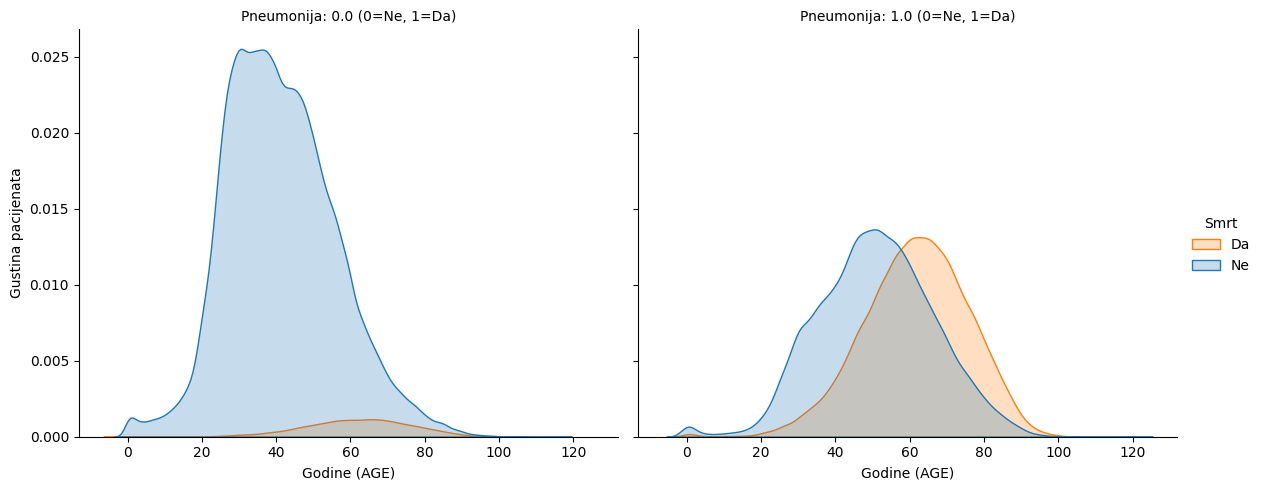

In [15]:
g = sns.FacetGrid(df, col="PNEUMONIA", height=5, aspect=1.2)
g.map(sns.kdeplot, "AGE", hue="DEATH", fill=True, data=df)
g.set_axis_labels("Godine (AGE)", "Gustina pacijenata")
g.set_titles("Pneumonija: {col_name} (0=Ne, 1=Da)")
g.add_legend(title="Smrt", labels=['Da', 'Ne'])
plt.savefig('../images/pneumonija_starost_smrtnost.png')
plt.show()

# Vidimo da grafik bez pneumonije (0) ima krivu preminulih koja je veoma niska. 
# To znači da je kod pacijenata koji nisu razvili upalu pluća smrtnost retka i uglavnom se dešava samo kod starih osoba

# Kod grafika sa pneumonijom (1) kriva preminulih koja je šira i viša
# To dokazuje da prisustvo pneumonije drastično povećava rizik od težih stanja

# Grafik dokazuje da pneumonija deluje kao glavni okidač koji podiže verovatnoću smrtnog ishoda za sve starosne grupe


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6060\3850355721.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_risk = df.pivot_table(index='AGE_GROUP', columns='PNEUMONIA', values='DEATH', aggfunc='mean') * 100


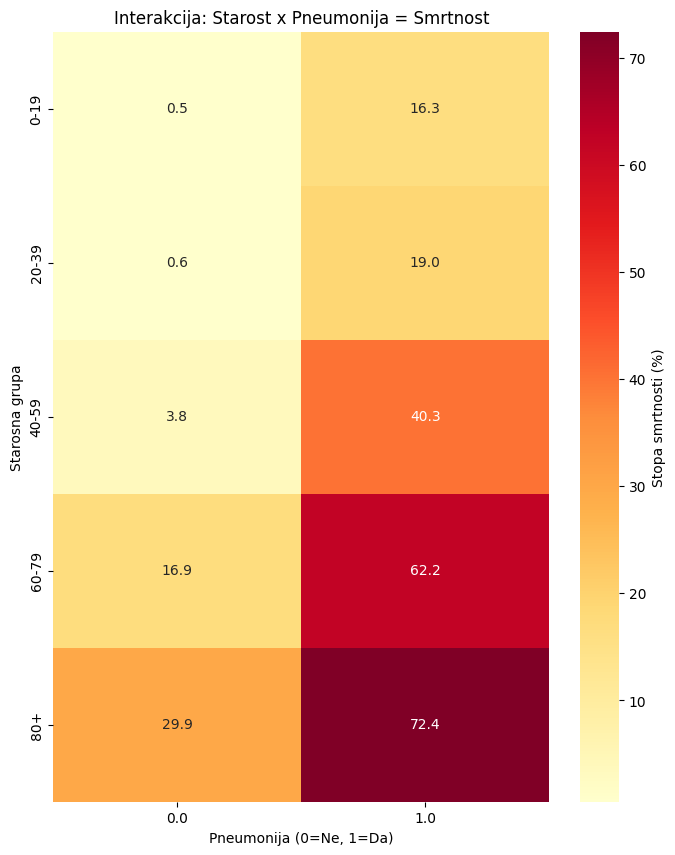

In [16]:
# Pošto smo u MongoDB-u videle da pneumonija kod starih nosi 72% smrtnosti,
# vizuelizacizovacemo te tri varijable.
pivot_risk = df.pivot_table(index='AGE_GROUP', columns='PNEUMONIA', values='DEATH', aggfunc='mean') * 100

plt.figure(figsize=(8, 10))
sns.heatmap(pivot_risk, annot=True, fmt=".1f", cmap='YlOrRd', cbar_kws={'label': 'Stopa smrtnosti (%)'})
plt.title('Interakcija: Starost x Pneumonija = Smrtnost')
plt.xlabel('Pneumonija (0=Ne, 1=Da)')
plt.ylabel('Starosna grupa')
plt.savefig('../images/pneumonija_i_starost_VS_smrtnost.png')
plt.show()